In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style


In [ ]:

%matplotlib inline
#设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [25]:
#读取文件
df_price = pd.read_excel('combine_price.xlsx')
df_rent = pd.read_excel('combine_rent.xlsx')

# Data Research

In [26]:
# Data description
df_price['price_sum'] = df_price['price_sum'] * 10000    # 调整单位 将房价的单位从‘万元’转化为‘元’
df_price.describe()   

,Unnamed: 0.1,Unnamed: 0,m2(esf),price_sum,P/m2,block
count,3552.000000,3552.000000,3552.000000,3.552000e+03,3552.000000,3552.000000
mean,521.490991,29.328829,121.578925,1.262254e+07,96894.885980,2.504505
std,358.981867,17.316572,68.446894,7.093253e+06,27894.675199,1.292040
min,0.000000,0.000000,2.000000,1.900000e+06,22949.000000,1.000000
25%,221.750000,14.000000,78.000000,7.500000e+06,75600.000000,1.000000
50%,443.500000,29.000000,109.110000,1.098000e+07,94344.000000,3.000000
75%,815.250000,44.000000,152.000000,1.569000e+07,117708.000000,4.000000
max,1259.000000,59.000000,559.390000,4.900000e+07,184172.000000,4.000000


In [27]:
df_rent['rent'] = df_rent['rent']*12    #调整单位 将月租金转化为年租金
df_rent.describe()

,Unnamed: 0.1,Unnamed: 0,m2(rent),rent,block
count,1448.000000,1448.000000,1448.000000,1.448000e+03,1448.000000
mean,201.242403,28.825276,80.125691,1.743311e+05,2.361878
std,134.542517,17.261772,74.673799,7.595001e+05,1.242079
min,0.000000,0.000000,6.000000,1.200000e+04,1.000000
25%,90.000000,14.000000,18.000000,2.640000e+04,1.000000
50%,180.500000,29.000000,59.000000,6.960000e+04,2.000000
75%,293.250000,44.000000,118.750000,1.320000e+05,4.000000
max,525.000000,59.000000,346.000000,9.600000e+06,4.000000


<Axes: >

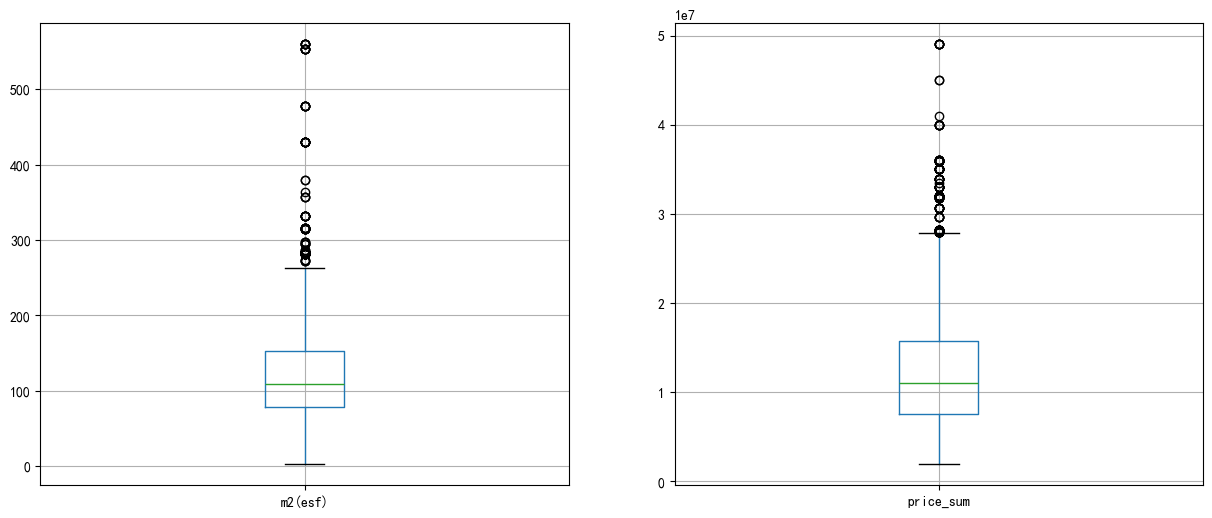

In [28]:
# find outliers
# use Box Plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
df_price.boxplot(column = ['m2(esf)'], ax = axes[0])
df_price.boxplot(column = ['price_sum'], ax = axes[1])

<Axes: >

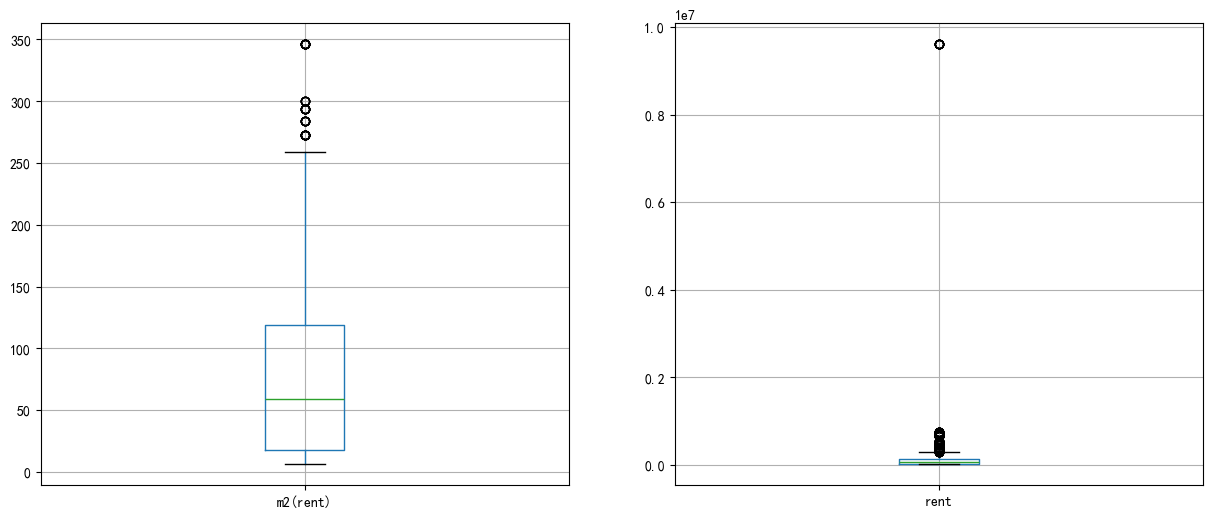

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
df_rent.boxplot(column = ['m2(rent)'], ax = axes[0])
df_rent.boxplot(column = ['rent'], ax = axes[1])

In [42]:
# price/m2  and rent/m2  for each block
df_rent['rent/m2'] = df_rent["rent"] / df_rent['m2(rent)']
df_rent['rent/m2'].describe()

count     1448.000000
mean      1815.782606
std       4155.519956
min        120.000000
25%       1086.883117
50%       1360.000000
75%       1680.000000
max      53631.284916
Name: rent/m2, dtype: float64

In [31]:
# price/m2 has already provided by the website
df_price['P/m2'].describe()

count      3552.000000
mean      96894.885980
std       27894.675199
min       22949.000000
25%       75600.000000
50%       94344.000000
75%      117708.000000
max      184172.000000
Name: P/m2, dtype: float64

In [32]:
# median price to rent ratio for each block
median_price = df_price.groupby("block")['price_sum'].median().reset_index()
median_price.columns = ['block', 'median_price']

median_rent = df_rent.groupby('block')['rent'].median().reset_index()
median_rent.columns = ['block', 'median_rent']

df_median = pd.merge(median_price, median_rent, on = 'block')

df_median['price_to_rent_ratio'] = df_median['median_price'] / df_median['median_rent']
df_median

,block,median_price,median_rent,price_to_rent_ratio
0,1,13880000.0,68400.0,202.923977
1,2,7050000.0,54000.0,130.555556
2,3,11000000.0,76200.0,144.356955
3,4,10650000.0,69600.0,153.017241


Text(0.5, 1.0, 'Figure A: Median price to rent ratio for each block')

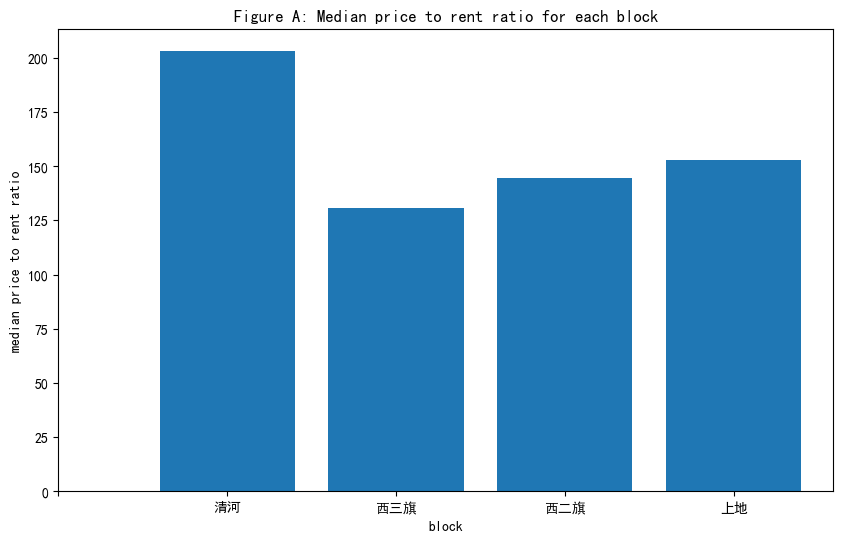

In [33]:
#Figure A: Bar Plot the median price to rent ratio for each block
plt.figure(figsize = (10,6))
plt.bar(df_median['block'], df_median['price_to_rent_ratio'])
block = ['','清河', '西三旗', '西二旗', '上地']
plt.xlabel('block')    
plt.xticks(ticks = range(len(block)), labels = block)
plt.ylabel('median price to rent ratio')
plt.title('Figure A: Median price to rent ratio for each block')


# Data Science

### Model 1
$ price/m2_i = \beta_0*m2_i + \beta_2*location_i + \beta_2*m2_i*location_i + \epsilon_i$

### Model 2
$ rent/m2_i = \beta_0*m2_i + \beta_2*location_i + \beta_3 *m2_i * location_i + \epsilon_i$

In [34]:
!pip install scikit-learn
from sklearn.linear_model import LinearRegression


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# train the model 1
df_price['m2_location'] = df_price['m2(esf)'] * df_price['block']
x1 = df_price[['m2(esf)','block','m2_location']]
y1 = df_price['P/m2']
model1 = LinearRegression().fit(x1, y1)

In [36]:
# train the model 2
df_rent['m2_location'] = df_rent['m2(rent)'] * df_price['block']
x2 = df_rent[['m2(rent)','block','m2_location']]
y2 = df_rent['rent/m2']
model2 = LinearRegression().fit(x2, y2)

In [37]:
# use model 1 and model 2 to predict price and rent for the m2 = 50, m2 = 100
m2s = [50, 100]
locations = [1, 2, 3, 4]
predictions = []
for m2 in m2s:
    for location in locations:
        m2_location = m2 * location
        X_new = [[m2, location, m2_location]]
        predicted_price_per_m2 = model1.predict(X_new)[0]
        predicted_rent_per_m2 = model2.predict(X_new)[0]
        predicted_price = predicted_price_per_m2 * m2
        predicted_rent = predicted_rent_per_m2 * m2
        predictions.append((m2, location, predicted_price, predicted_rent))

df_predict = pd.DataFrame(predictions)
df_predict.columns = ['m2', 'block', 'price', 'rent']
df_predict


C:\Users\102zz\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\102zz\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\102zz\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\102zz\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\102zz\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names

,m2,block,price,rent
0,50,1,4.546027e+06,108841.187170
1,50,2,4.803934e+06,86708.676616
2,50,3,5.061840e+06,64576.166061
3,50,4,5.319747e+06,42443.655506
4,100,1,9.563032e+06,242563.296936
5,100,2,9.620631e+06,190696.168080
6,100,3,9.678230e+06,138829.039224
7,100,4,9.735828e+06,86961.910368


In [38]:
# Figure B and C : Bar Plot the price to ratio for each block for the m2=50, m2=100
df_predict['price_to_rent_ratio'] = df_predict['price']/ df_predict['rent']
df_predict_50 = df_predict[df_predict['m2']==50]
df_predict_100 = df_predict[df_predict['m2']==100]
df_predict_50, df_predict_100


(   m2  block         price           rent  price_to_rent_ratio
 0  50      1  4.546027e+06  108841.187170            41.767524
 1  50      2  4.803934e+06   86708.676616            55.403148
 2  50      3  5.061840e+06   64576.166061            78.385582
 3  50      4  5.319747e+06   42443.655506           125.336685,
     m2  block         price           rent  price_to_rent_ratio
 4  100      1  9.563032e+06  242563.296936            39.424891
 5  100      2  9.620631e+06  190696.168080            50.450047
 6  100      3  9.678230e+06  138829.039224            69.713293
 7  100      4  9.735828e+06   86961.910368           111.955090)

Text(0.5, 1.0, 'Figure C: predictions for m2 = 100')

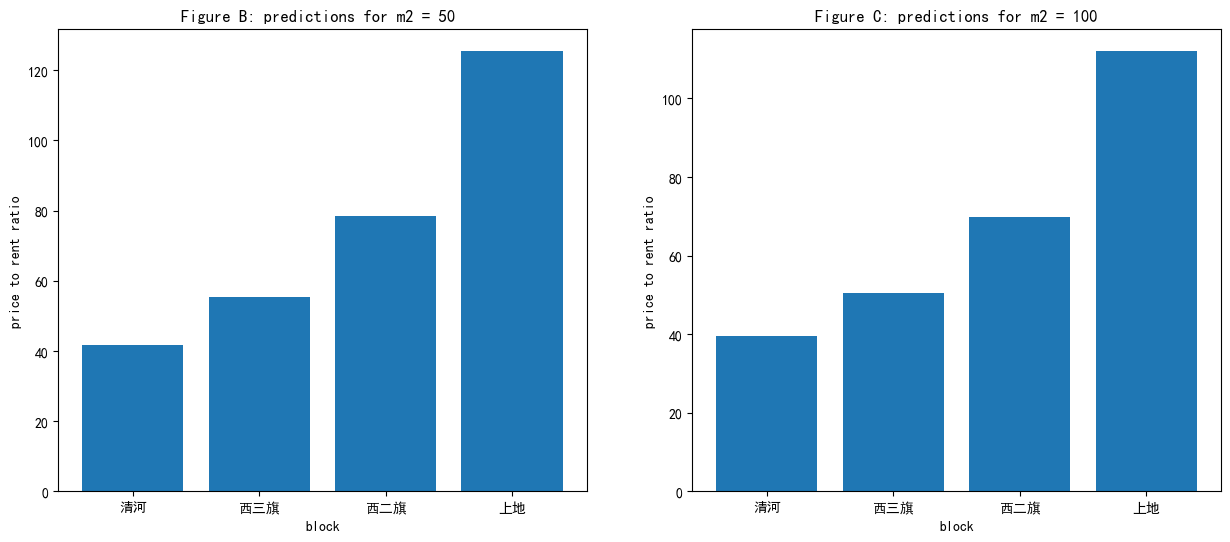

In [39]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
#Figure B
axes[0].bar(df_predict_50['block'], df_predict_50['price_to_rent_ratio'])
axes[0].set_xlabel('block')
axes[0].set_xticks(df_predict_50['block'])
axes[0].set_xticklabels(['清河','西三旗','西二旗','上地'])
axes[0].set_ylabel('price to rent ratio')
axes[0].set_title('Figure B: predictions for m2 = 50 ')

#Figure C
axes[1].bar(df_predict_100['block'],df_predict_100['price_to_rent_ratio'])
axes[1].set_xlabel('block')
axes[1].set_xticks(df_predict_100['block'])
axes[1].set_xticklabels(['清河','西三旗','西二旗','上地'])
axes[1].set_ylabel('price to rent ratio')
axes[1].set_title('Figure C: predictions for m2 = 100')


